In [1]:
from tock import *

In [2]:
m = FiniteAutomaton()

In [3]:
m.set_start_state("q1")

In [4]:
m.add_transition("q1,0 -> q1")

The transition is specified using a string, but a lot of other forms are allowed as well:

In [5]:
m.add_transition("q1,0", "q1")
m.add_transition(["q1","0"], ["q1"])

To add a bunch of transitions at once:

In [6]:
m.add_transitions(["q1,1 -> q1",
                   "q1,1 -> q2",
                   "q2,& -> q3",
                   "q2,0 -> q3",
                   "q3,1 -> q4",
                   "q4,0 -> q4",
                   "q4,1 -> q4"])

In [7]:
m.add_accept_state("q4")

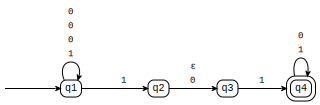

In [8]:
m

You can create pushdown automata and Turing machines in a similar way using `PushdownAutomaton` and `TuringMachine`. But many other kinds of automata can be created by instantiating a `Machine` directly.

In [9]:
m = Machine(5, state=0, input=1)

The first argument is required and says how many "stores" the machine has, each of which can be used as a state, a stack, a tape, or whatever. So this machine has 5 stores.

The argument `state=0` means that store 0 is the state. It's this store that is used to define the start and accept conditions, and this store that is used to define the nodes in a state transition diagram.

The argument `input=1` is required and means that store 1 is the input. When the automaton is run, the input string will be placed on this store.

In [10]:
m = Machine(4, state=0, input=1, oneway=True)

The argument `oneway=True` means that the automaton only consumes the input; it doesn't write to the input and it doesn't ever move backward. When this flag is set, a couple of things happen.

- Since the right-hand side of a transition always has an empty input, it is omitted. For example, finite automaton transitions have 2 members on the left-hand side and only 1 member on the right-hand side.
- The input must be entirely consumed in order for the machine to accept the input string. Formally, this means that the accepting configuration has a blank symbol (`_`) for the input.

It's also possible to define more complicated starting and accepting configurations. Do this using `set_accept_config` instead of `set_accept_state`, and `add_accept_config(s)` instead of `add_accept_state(s)`. For example, if the above machine is a 2-stack PDA and we want to require that both stacks are empty:

In [11]:
m.add_accept_config("qf,&,_,_")

In this case, it doesn't matter whether the condition for the input is `&` or `_`; because `oneway=True`, it will be set to `_` regardless.